<a href="https://colab.research.google.com/github/simodepth/Search-Console/blob/main/Visualise_Search_Console_Coverage_Reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualise Search Console Coverage Reports
Spot issues fast by visualising your Search Console **Coverage Reports**. Especially useful to visualise low quality folder paths at a glance (crawled, not indexed).


---


How to Use
- Upload an Excel file from your Coverage Report. This could be whatever you want depdning on the issues or warning displayed in the Grey box referring to as **"Excluded - noindexed"**


In [ ]:
# set optional folder depth offset # default = 1
folder_start = 2
# Custom Title for Reports
title = "Coverage Report"

In [ ]:
#@title Install Packages
# install plotly==5.0.0 version
!pip install pandas
!pip install pip install plotly==5.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.1 MB 226 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
#@title Import Packages
import re
import urllib.parse as urlparse
from collections import Counter
from glob import glob

import matplotlib.pyplot as plt
import nltk
import pandas as pd
import plotly.express as px
from nltk.corpus import stopwords
from wordcloud import WordCloud
from google.colab import files

In [ ]:
#@title Upload any GSC Coverage Report as Excel ONLY
# we are using an input function via Google Colab
uploaded = files.upload()

Saving Alternative page with proper canonical tag.xlsx to Alternative page with proper canonical tag.xlsx


In [ ]:
#@title Set up the XLSX Reading
filename = list(uploaded.keys())[0]  # get the filename from the upload
df = pd.read_excel(filename, 'Table')  # choose the right sheet from Excel
nltk.download('stopwords')
print(df.head())

                                                 URL Last crawled
0  https://www.balenciaga.com/ja-jp/dynasty-d-fra...   2022-08-20
1  https://www.balenciaga.com/it-it/borsetta-a-se...   2022-08-20
2  https://www.balenciaga.com/en-us/metal-hoodie-...   2022-08-20
3  https://www.balenciaga.com/ja-jp/storelocator/...   2022-08-20
4  https://www.balenciaga.com/en-us/cities-london...   2022-08-20


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#@title Data Cleaning
df['total_urls'] = 1  # used to count in the grouping
df["protocol"], df["domain"], df["path"], df["query"], df["fragment"] = zip(*df["URL"].map(urlparse.urlsplit))

# make temp df to split with expand=true and then merge back by the index.
df['path'] = df['path'].apply(lambda x: x.replace("//", "/"))
df2 = df['path'].str.split('/', expand=True)
df2 = df2.fillna("missing_value")
df = pd.merge(df, df2, left_index=True, right_index=True)
next_folder = folder_start + 1

In [ ]:
# concat 0 + 1 path to merge and group by each depth. e.g. level1  + level 2 together.
df['level_1+2'] = "/" + df[next_folder]

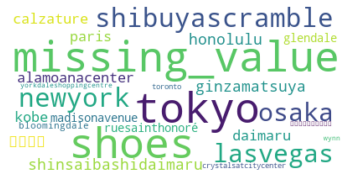

In [ ]:
#@title Display the main Entities involved in the Issue
cnt = Counter()
english_stopwords = set(stopwords.words('english'))

for path in df['level_1+2']:
  words = re.split("[-/]", path)
  for word in words:
    if len(word) > 0 and word not in english_stopwords and not word.isdigit():
      cnt[word] += 1

cnt.most_common(25)

word_cloud = [x[0] for x in cnt.most_common(25)]
word_cloud_obj = WordCloud(max_words=25, background_color="white").generate(" ".join(word_cloud))

plt.imshow(word_cloud_obj, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud.png', dpi=300)
plt.show()

In [ ]:
#@title Display a Treemap of the Website where the Issues Occur
try:
    treemap_fig = px.treemap(df, path=[px.Constant(title), folder_start, next_folder, 'URL'],values='total_urls', color_discrete_sequence=px.colors.qualitative.Antique)
except ValueError:
    print("Not all URLs can go to a url depth of", folder_start, "using default depths instead.")
    folder_start = 1
    next_folder = 2
    treemap_fig = px.treemap(df, path=[px.Constant(title), folder_start, next_folder, 'URL'], values='total_urls', color_discrete_sequence=px.colors.qualitative.Antique)
    pass

treemap_fig.show()

In [ ]:
#@title Display a sun burst as an alternative
try:
    sunburst_fig = px.sunburst(df, path=[px.Constant(title), folder_start, next_folder, 'URL'],values='total_urls', color_discrete_sequence=px.colors.qualitative.Antique)
except ValueError:
    print("Not all URLs can go to a url depth of", folder_start, "using default depths instead.")
    folder_start = 1
    next_folder = 2
    sun_burst_fig = px.treemap(df, path=[px.Constant("Coverage Report", ), folder_start, next_folder, 'URL'], values='total_urls', color_discrete_sequence=px.colors.qualitative.Antique)
    pass

sunburst_fig.show()

#Download the Reports

In [ ]:
#@title Download the sunburst .html chart
sunburst_fig.write_html("coverage_report_sunburst.html")
files.download("coverage_report_sunburst.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Download the treemap .html chart
treemap_fig.write_html("coverage_report_treemap.html")
files.download("coverage_report_treemap.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Download the word_cloud chart
files.download("word_cloud.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>